In [294]:
import pandas as pd
!pip install numpy
!pip install pandas
!pip install --user matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

<h1>Descrever o objetivo do modelo considerando a estrutura do conjunto de dados - o que se pretende solucionar?</h1>

<p> O objetivo desta analise é obter dados e características sobre filmes e programas de Tv listados no catálogo da netflix, podendo incluir dados como: titulo, tipo, diretor, elenco, país de origem do filme, série ou programa de TV, duração, etc. Com base na coleta de dados poderemos ter a análise sobre a popularidade com o publico.</p>
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<h2>Descrever o conjunto de dados escolhido. Indique os seguintes pontos:</h2>
<p>Origem: https://www.kaggle.com/datasets/shivamb/netflix-shows</p>
<p>Nome: Netflix Movies and Tv Shows </p>
<p>Tamanho: 1.368KB </p>
<p>Quantidade de Registros: 101.377</p>
<p>Linhas x Colunas: 8807x12 </p>
<p>Dados Faltantes: 4307</p>

<h2>Criar 03 (três) modelos de classificação:</h2>
<span>Encontrar um conjunto de dados que atenda os requisitos para classificação (variável resposta)</span>

Ao analisarmos o .CSV podemos listar ao menos três tipos de classificações:

<li>Tipo(type)</li>
<li>Faixa etária (rating)</li>
<li>Id (s1)</li>

In [295]:
#primeira importação do CSV
dados = pd.read_csv('../cp/netflix_titles.csv')

In [296]:
#Imprimindo primeiros dez dados do csv
dados.head(11)

,Unnamed: 0.1,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,avaliacao
0,0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",10
1,1,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",10
2,2,2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,10
3,3,3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",10
4,4,4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,10
5,5,5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,10
6,6,6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,10
7,7,7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",10
8,8,8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,10
9,9,9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,10


In [297]:
#Identificando o total de linhas que há no csv
len(dados.index)

8807

In [298]:
#criando variavel para identificar dados faltantes para depois soma-los
resultado = dados.isnull().sum()

In [299]:
print(resultado)

Unnamed: 0.1       0
Unnamed: 0         0
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
avaliacao          0
dtype: int64


In [300]:
#deixando mais explicito a identificação de dados, tanto completos quanto faltantes 
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  8807 non-null   int64 
 1   Unnamed: 0    8807 non-null   int64 
 2   show_id       8807 non-null   object
 3   type          8807 non-null   object
 4   title         8807 non-null   object
 5   director      6173 non-null   object
 6   cast          7982 non-null   object
 7   country       7976 non-null   object
 8   date_added    8797 non-null   object
 9   release_year  8807 non-null   int64 
 10  rating        8803 non-null   object
 11  duration      8804 non-null   object
 12  listed_in     8807 non-null   object
 13  description   8807 non-null   object
 14  avaliacao     8807 non-null   int64 
dtypes: int64(4), object(11)
memory usage: 1.0+ MB


<h1>Descrever o pré-processamento realizado no conjunto de dados (Feature engineering):</h1>

<p>Criação ou exclusão de variáveis:</p>

In [301]:
exercicioDados = pd.read_csv('../cp/netflix_titles.csv')

In [302]:
#printando os dados do csv de maneira mais organizada com o 'transpose'
print(exercicioDados.head(5).transpose())

                                                              0  \
Unnamed: 0.1                                                  0   
Unnamed: 0                                                    0   
show_id                                                      s1   
type                                                      Movie   
title                                      Dick Johnson Is Dead   
director                                        Kirsten Johnson   
cast                                                        NaN   
country                                           United States   
date_added                                   September 25, 2021   
release_year                                               2020   
rating                                                    PG-13   
duration                                                 90 min   
listed_in                                         Documentaries   
description   As her father nears the end of his life, filmm..

In [303]:
#deixando mais explicito o nome das colunas para evitar erros
print(exercicioDados.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'show_id', 'type', 'title', 'director',
       'cast', 'country', 'date_added', 'release_year', 'rating', 'duration',
       'listed_in', 'description', 'avaliacao'],
      dtype='object')


<h4>EXCLUSÃO DE ID:</h4>

In [304]:
#identificador do Id
idDelete = 's1'

In [305]:
#transformando a variavel anterior em uma variavel que armazena o nome da coluna para indentifica-la
dadosExcluir = exercicioDados.index[exercicioDados['show_id'] == idDelete].tolist()[0]


In [306]:
#dropando o id reconhecido pela coluna
exercicioDados = exercicioDados.drop(dadosExcluir)

In [307]:
#printando os resultados
print(exercicioDados.head(4).transpose())

                                                              1  \
Unnamed: 0.1                                                  1   
Unnamed: 0                                                    1   
show_id                                                      s2   
type                                                    TV Show   
title                                             Blood & Water   
director                                                    NaN   
cast          Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
country                                            South Africa   
date_added                                   September 24, 2021   
release_year                                               2021   
rating                                                    TV-MA   
duration                                              2 Seasons   
listed_in       International TV Shows, TV Dramas, TV Mysteries   
description   After crossing paths at a party, a Cape Town t..

<h4>Criação de variável: </h4>

In [308]:
#importando csv para ter melhor visualização das variáveis
criacaoVariavel = pd.read_csv('../cp/netflix_titles.csv')

In [309]:
#impressão das variáveis
criacaoVariavel.head(3)

,Unnamed: 0.1,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,avaliacao
0,0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",10
1,1,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",10
2,2,2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,10


In [310]:
#adicionando lista vazia para o dataFrame
novaVariavel = ['10'] * len(criacaoVariavel)

In [311]:
#adicionar a variavel ao dataFrame
criacaoVariavel['avaliacao'] = novaVariavel

In [312]:
#incluindo nova variavel e salvado o dataFrame atualizado
criacaoVariavel.to_csv('../cp/netflix_titles.csv', index=True)

In [313]:
print(criacaoVariavel.head(1))

   Unnamed: 0.1  Unnamed: 0 show_id   type                 title  \
0             0           0      s1  Movie  Dick Johnson Is Dead   

          director cast        country          date_added  release_year  \
0  Kirsten Johnson  NaN  United States  September 25, 2021          2020   

  rating duration      listed_in  \
0  PG-13   90 min  Documentaries   

                                         description avaliacao  
0  As her father nears the end of his life, filmm...        10  


<h4>Padronização:</h4>

In [314]:
from sklearn.preprocessing import StandardScaler

In [315]:
# importando skelarn para padronização de dados
scaler = StandardScaler()

In [316]:
#Cópia do Df para não conflitar com original
variavelPadronizada = criacaoVariavel.copy()  # Crie uma cópia do DataFrame

In [317]:
#padronizando coluna release year
variavelPadronizada['release_year_standardized'] = scaler.fit_transform(criacaoVariavel[['release_year']])

In [318]:
media = variavelPadronizada['release_year_standardized'].mean()
desvioPadrao = variavelPadronizada['release_year_standardized'].std()

print("Média da coluna padronizada:", media)
print("Desvio padrão da coluna padronizada:", desvioPadrao)

Média da coluna padronizada: 7.538675284367407e-15
Desvio padrão da coluna padronizada: 1.0000567778566818


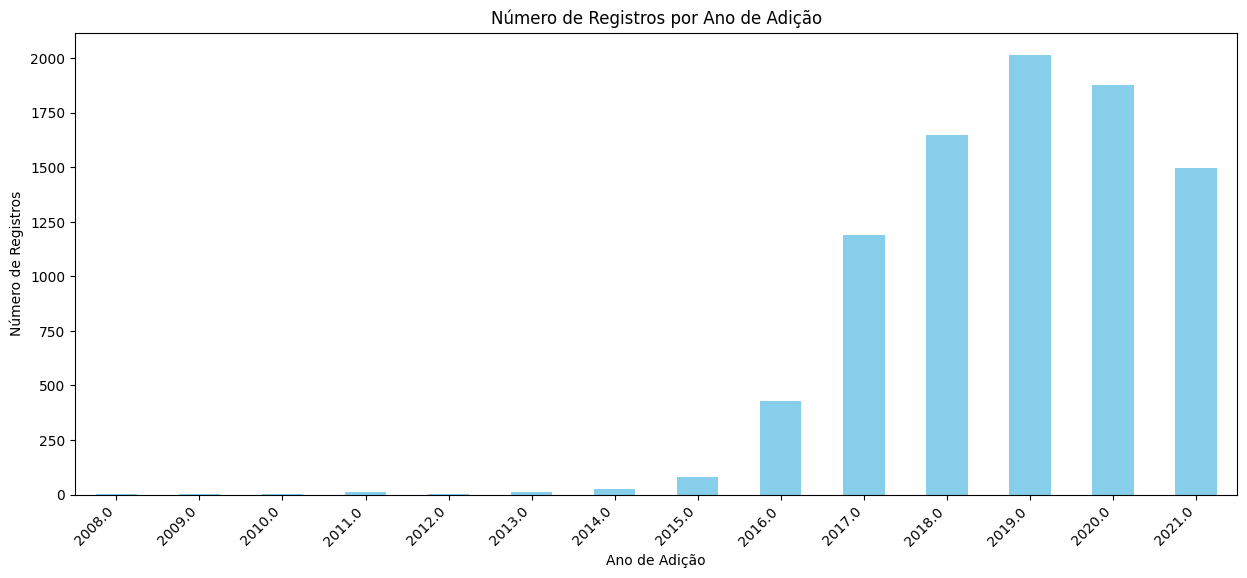

In [319]:
# Carregar os dados do CSV para um DataFrame
criacaoVariavel = pd.read_csv('../cp/netflix_titles.csv')

# Remover espaços extras das datas na coluna 'date_added'
criacaoVariavel['date_added'] = criacaoVariavel['date_added'].str.strip()

# Converter a coluna 'date_added' para o formato datetime
criacaoVariavel['date_added'] = pd.to_datetime(criacaoVariavel['date_added'], errors='coerce')

# Agrupar por ano e contar o número de registros por ano
data_net = criacaoVariavel['date_added'].dt.year.value_counts().sort_index()

# Plotar o gráfico de barras
plt.figure(figsize=(15, 6))
data_net.plot(kind='bar', color='skyblue')
plt.title('Número de Registros por Ano de Adição')
plt.xlabel('Ano de Adição')
plt.ylabel('Número de Registros')
plt.xticks(rotation=45, ha='right')
plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\minel\AppData\Local\Temp\ipykernel_20392\2048491022.py:5: SyntaxWarning: invalid escape sequence '\d'
  dataFrame['duration'] = dataFrame['duration'].str.extract('(\d+)').astype(float)


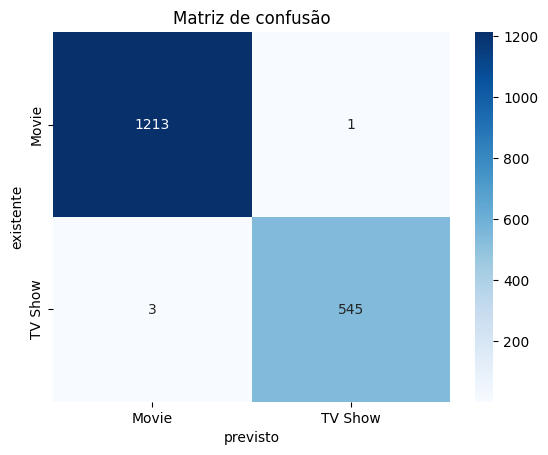

              precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      1214
     TV Show       1.00      0.99      1.00       548

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762



In [328]:
# carregando csv da netflix
dataFrame = pd.read_csv('../cp/netflix_titles.csv')

#removendo strings para nao haver conflitos
dataFrame['duration'] = dataFrame['duration'].str.extract('(\d+)').astype(float)

# analisando colunas para plotar diferencas
X = dataFrame[['duration', 'release_year']] 
y = dataFrame['type']  

# Dividir os dados em conjuntos de treinamento e teste
xTreino, xTeste, yTreino, yTeste = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento dos
modeloTreino = DecisionTreeClassifier()
modeloTreino.fit(xTreino, yTreino)

# Fazer previsões
prev = modeloTreino.predict(xTeste)

# 
calculo = confusion_matrix(yTeste, prev)

# Plotar a matriz de confusão
sns.heatmap(calculo, annot=True, cmap='Blues', fmt='g', xticklabels=modeloTreino.classes_, yticklabels=modeloTreino.classes_)
plt.xlabel('previsto')
plt.ylabel('existente')
plt.title('Matriz de confusão')
plt.show()

# printando dados da analise

print(classification_report(yTeste, prev))